<a href="https://colab.research.google.com/github/Amenasetheru/Deep-Learning-Projects/blob/main/Project_4_Credit_Card_Fraud_Detection_with_CNN_AAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Credit Card Fraud Detection Using Convolutional Neural Networks with TensorFlow.


## Project Overview:

In this project, we developed a Convolutional Neural Network (CNN) using TensorFlow to detect fraudulent transactions in a credit card fraud detection dataset. The credit card detection dataset includes various features related to credit card transactions, and the objective is to classify transactions as fraudulent or legitimate.

## Introduction

Credit card fraud represents a significant concern for financial institutions and individuals alike. This project tackles the challenge to develop a machine learning model that detects fraudulent transactions using a Convolutional Neural Network (CNN) architecture built with TensorFlow

In this project, we utilized credit card detection dataset which is  publicly available on Kaggle. Our credit card fraud detection dataset was highly imbalanced where 99.8% of transactions were legitimate (majority class) and only 0.2% were fraudulent (minority class)

Now, training a machine learning model on an imbalanced dataset can lead to several consequences:
Among those, the model tends to prioritize the majority class and to struggle to learn the patterns of the minority class.

To address this problem in this project, we chose the Under-sampling technique: A technique that specifically focuses on reducing the number of data points in the majority class (legitimate transactions in credit card fraud detection) to achieve a more balanced representation with the minority class (fraudulent transactions).
However, it is always recommended to use Under-sampling with cautious: this technique can cause the loss of information because removing data points can lead to a loss of valuable information from the majority class.

**Model Architecture**

We designed a CNN model with multiple convolutional and fully connected layers.
we used activation functions like ReLU to introduce learn non-linear relationships and included dropout layers to prevent overfitting.

**Model Training**

We trained the model using the training set and evaluated its performance on the validation set.
We used metrics such as accuracy, ROC AUC score, confusion matrix, and classification report to evaluate the model.

**Model Evaluation**

We assessed the model's performance on the test set using accuracy and ROC AUC score.
We visualized the results using confusion matrix and classification report.

## Results

This project successfully built a CNN-based credit card fraud detection model with encouraging results.

- **High Accuracy and ROC AUC Score**:
 * The model achieved a high accuracy of 0.9192 and an impressive ROC AUC score of 0.9624 on the test set, indicating its robustness in detecting fraudulent transactions.

- **Detailed Evaluation Metrics**:
 * The confusion matrix and classification report provided a comprehensive evaluation of the model’s performance, highlighting its precision, recall, and F1 score for both classes.


## Step 1: Importing Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_auc_score

In [ ]:
# Checking the tensorflow version
print(tf.__version__)

2.15.0


## Step 2: Loading the dataset

In [ ]:
# Creating a path for the dataset
path = "/content/drive/MyDrive/Final_ML_Project_to_Build/creditcard.csv"

In [ ]:
# Reading the dataset
df = pd.read_csv(path)

In [ ]:
# Displyaing the first five rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Step 3: Preparing and Processing the Imbalanced Credit Card Fraud Detection Dataset

* Calculating the number of data points in each class.
* Determining a sampling ratio to match he minority class size
* Randomly sampling data points from the majority class using sample and a random state for reproducibility.
* Combining the under-sampled majority class with the original minority class for a more balanced dataset.
* Handling missing values
* Exploring the data to understand the distribution of the classes
* Dropping features that are not useful to the model
* Normalizing features to ensure features are on a similar scale.
* Splitting data into training, validation, and test sets


In [ ]:
# Checking the shape
df.shape

(284807, 31)

In [ ]:
# Checking missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Getting information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Getting statistical information on the numerical features
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Checking the class column distribution i
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

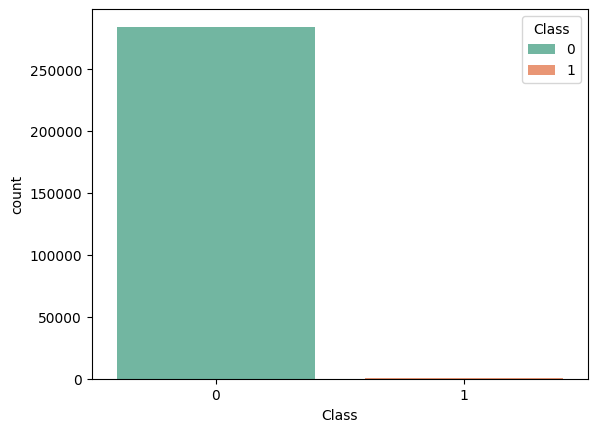

In [ ]:
# Visualizing class column distribution
sns.countplot(data =df, x="Class", hue="Class", palette="Set2");

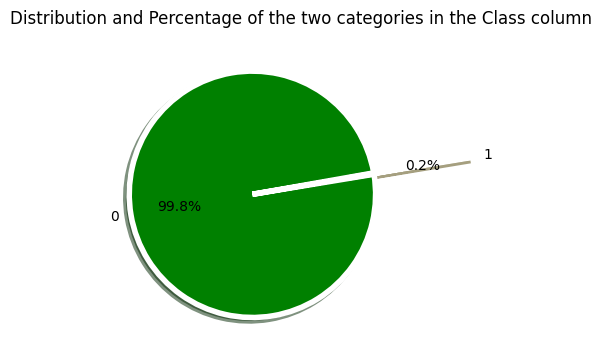

In [ ]:
# Visualizing both the distribution and percentage of the two categories in the class feature with a pie chart
fig = plt.figure(figsize=(4, 4))
colors = ("green", "gold")
wp ={"linewidth": 4, "edgecolor":"white"}
tag = df["Class"].value_counts()
explode = (0.4, 0.4)
tag.plot(kind="pie", autopct="%1.1f%%", colors=colors, shadow=True, wedgeprops=wp, explode=explode, label="", startangle=10)
plt.title("Distribution and Percentage of the two categories in the Class column")
plt.show()

In [ ]:
# Getting the non fraud class
non_fraud = df.query("Class == 0")

In [ ]:
# Getting the fraud class
fraud = df.query("Class == 1")

In [ ]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [ ]:
# Balancing the dataset by sampling and creating a new DataFrame named non_fraud_sample containing a random sample of 492 rows from the original non_fraud DataFrame.
non_fraud_sample = non_fraud.sample(n=492)

In [ ]:
# Concatenating both dataframes fraud and non fraud_sample
balanced_df = pd.concat([fraud, non_fraud_sample], ignore_index=True)

In [ ]:
# Observations in each class
balanced_df["Class"].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [ ]:
# Checking the balanced dataframe
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,71361.0,0.986128,-0.243271,1.343364,1.218795,-1.135148,-0.265079,-0.557187,0.022456,0.569375,...,0.318064,0.814576,-0.160749,0.434144,0.363857,-0.267397,0.064909,0.061457,100.04,0
980,80390.0,-1.234839,0.886007,1.878960,-0.572376,0.738216,-0.651306,0.993559,-0.400699,0.200025,...,-0.348047,-0.765764,-0.261158,-0.007693,0.074557,-0.032180,-0.476139,-0.276273,3.59,0
981,166405.0,-5.167269,-6.657790,-2.947100,0.863368,6.943564,-5.024683,-2.098135,0.303612,-0.032190,...,1.216726,0.964049,-0.247357,0.177341,-0.849068,-0.712874,0.325207,-0.903970,1.00,0
982,74518.0,1.212817,0.309481,0.278839,0.643197,-0.180087,-0.601571,0.013002,-0.068436,0.020312,...,-0.259229,-0.711081,0.158016,0.035459,0.145101,0.123912,-0.006262,0.027564,1.98,0


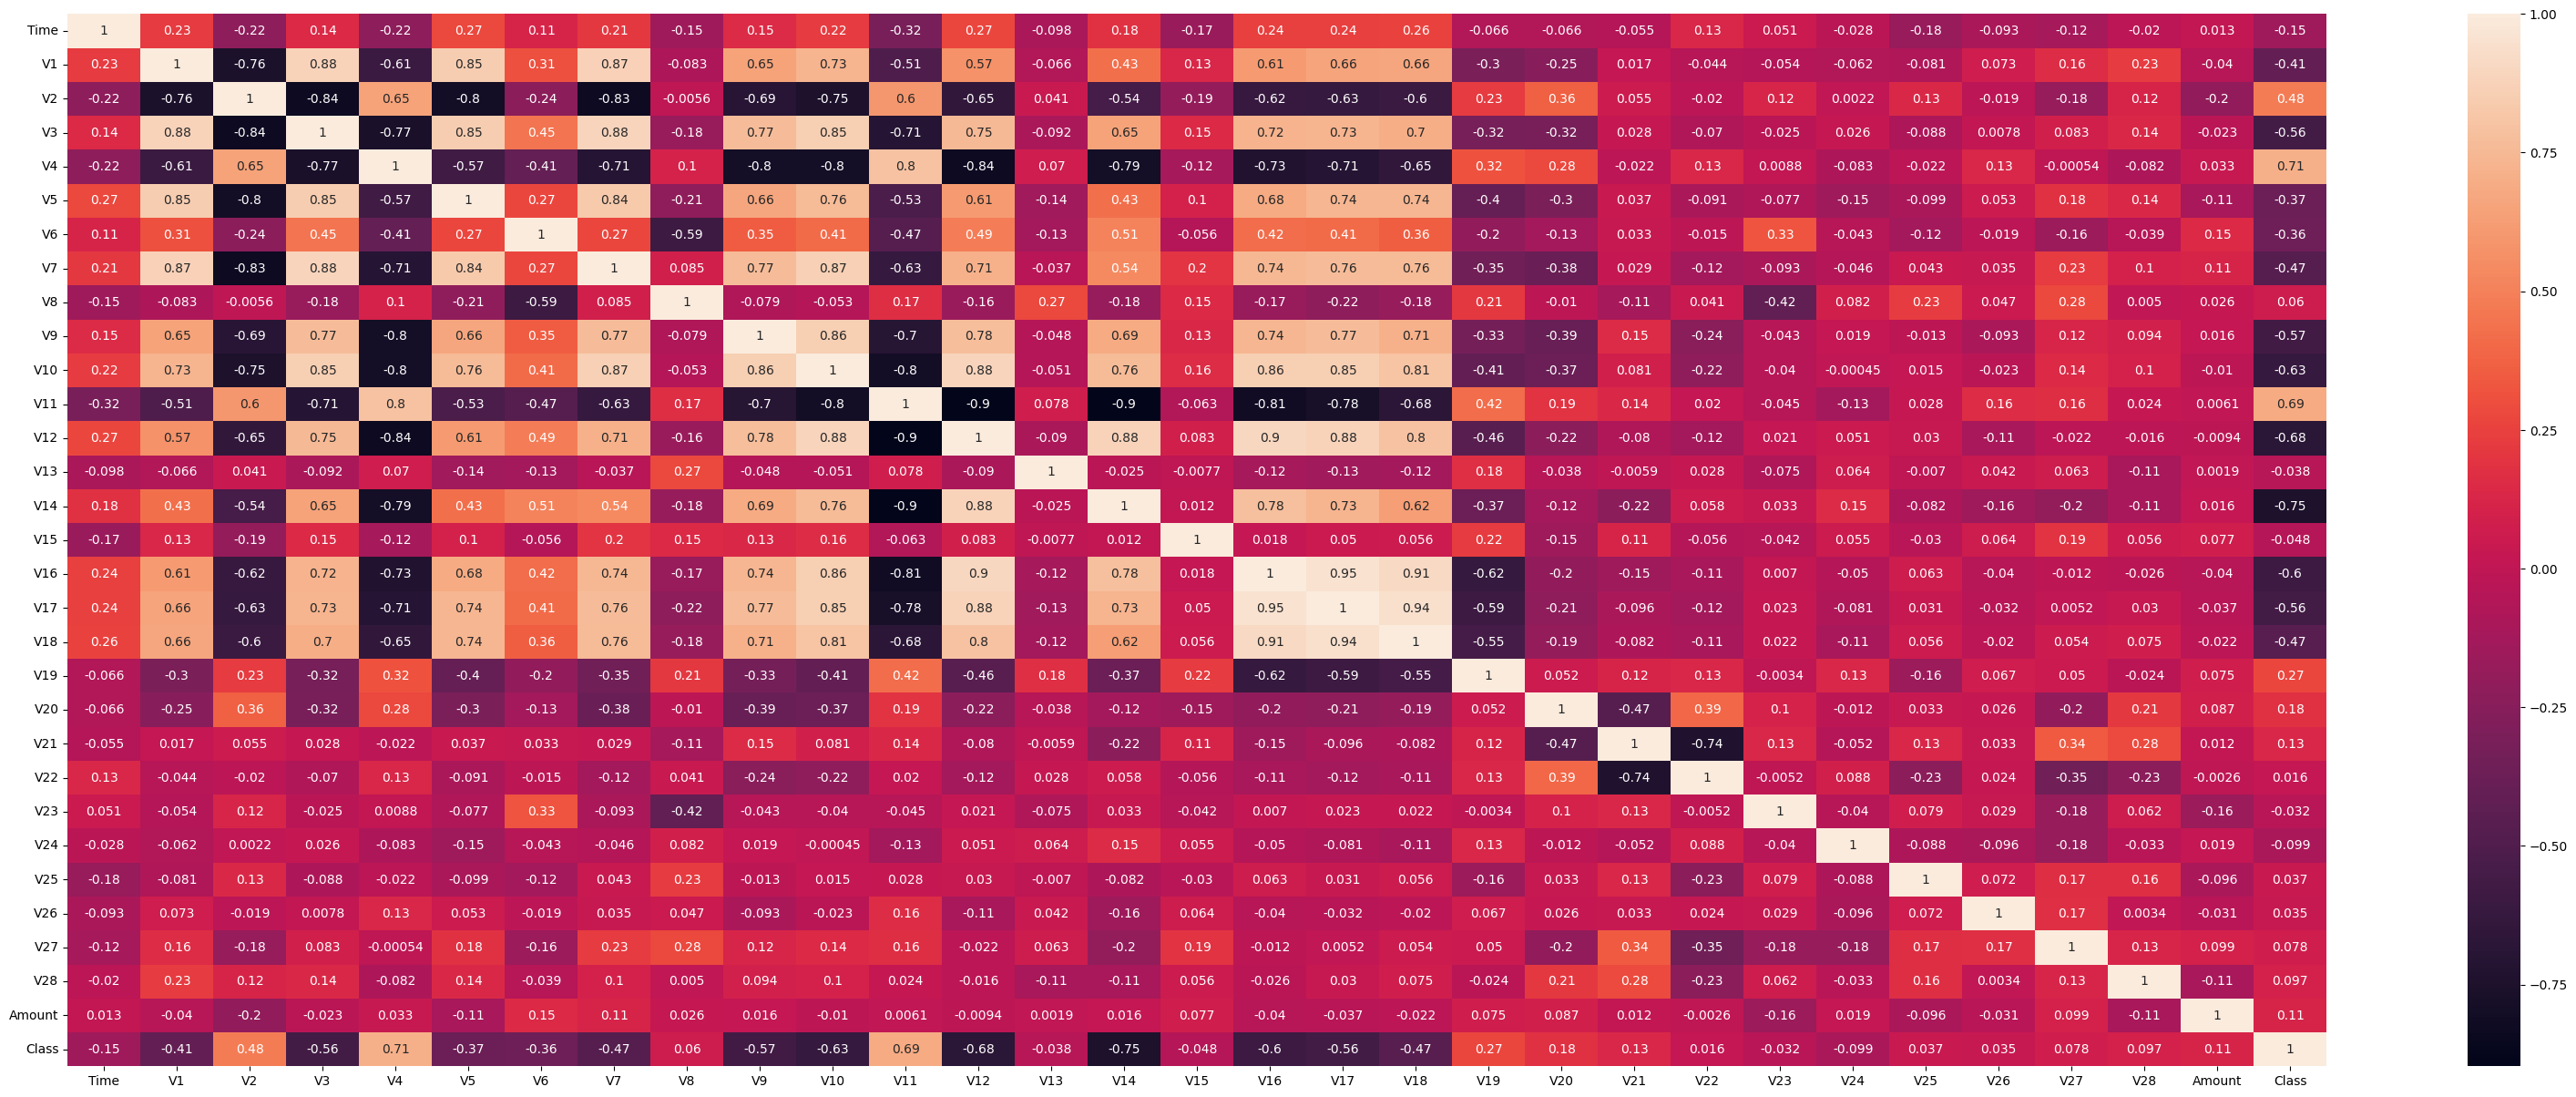

In [ ]:
# Checking the correlation among variables
plt.figure(figsize=(40, 15))
sns.heatmap(balanced_df.corr(), annot=True);
# It seems to exist no correlation among all those features. That is certainly due to the using of Principal Component Analysis (PCA)

In [ ]:
# Creating column headers
column_headers = balanced_df.columns.values
column_headers

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

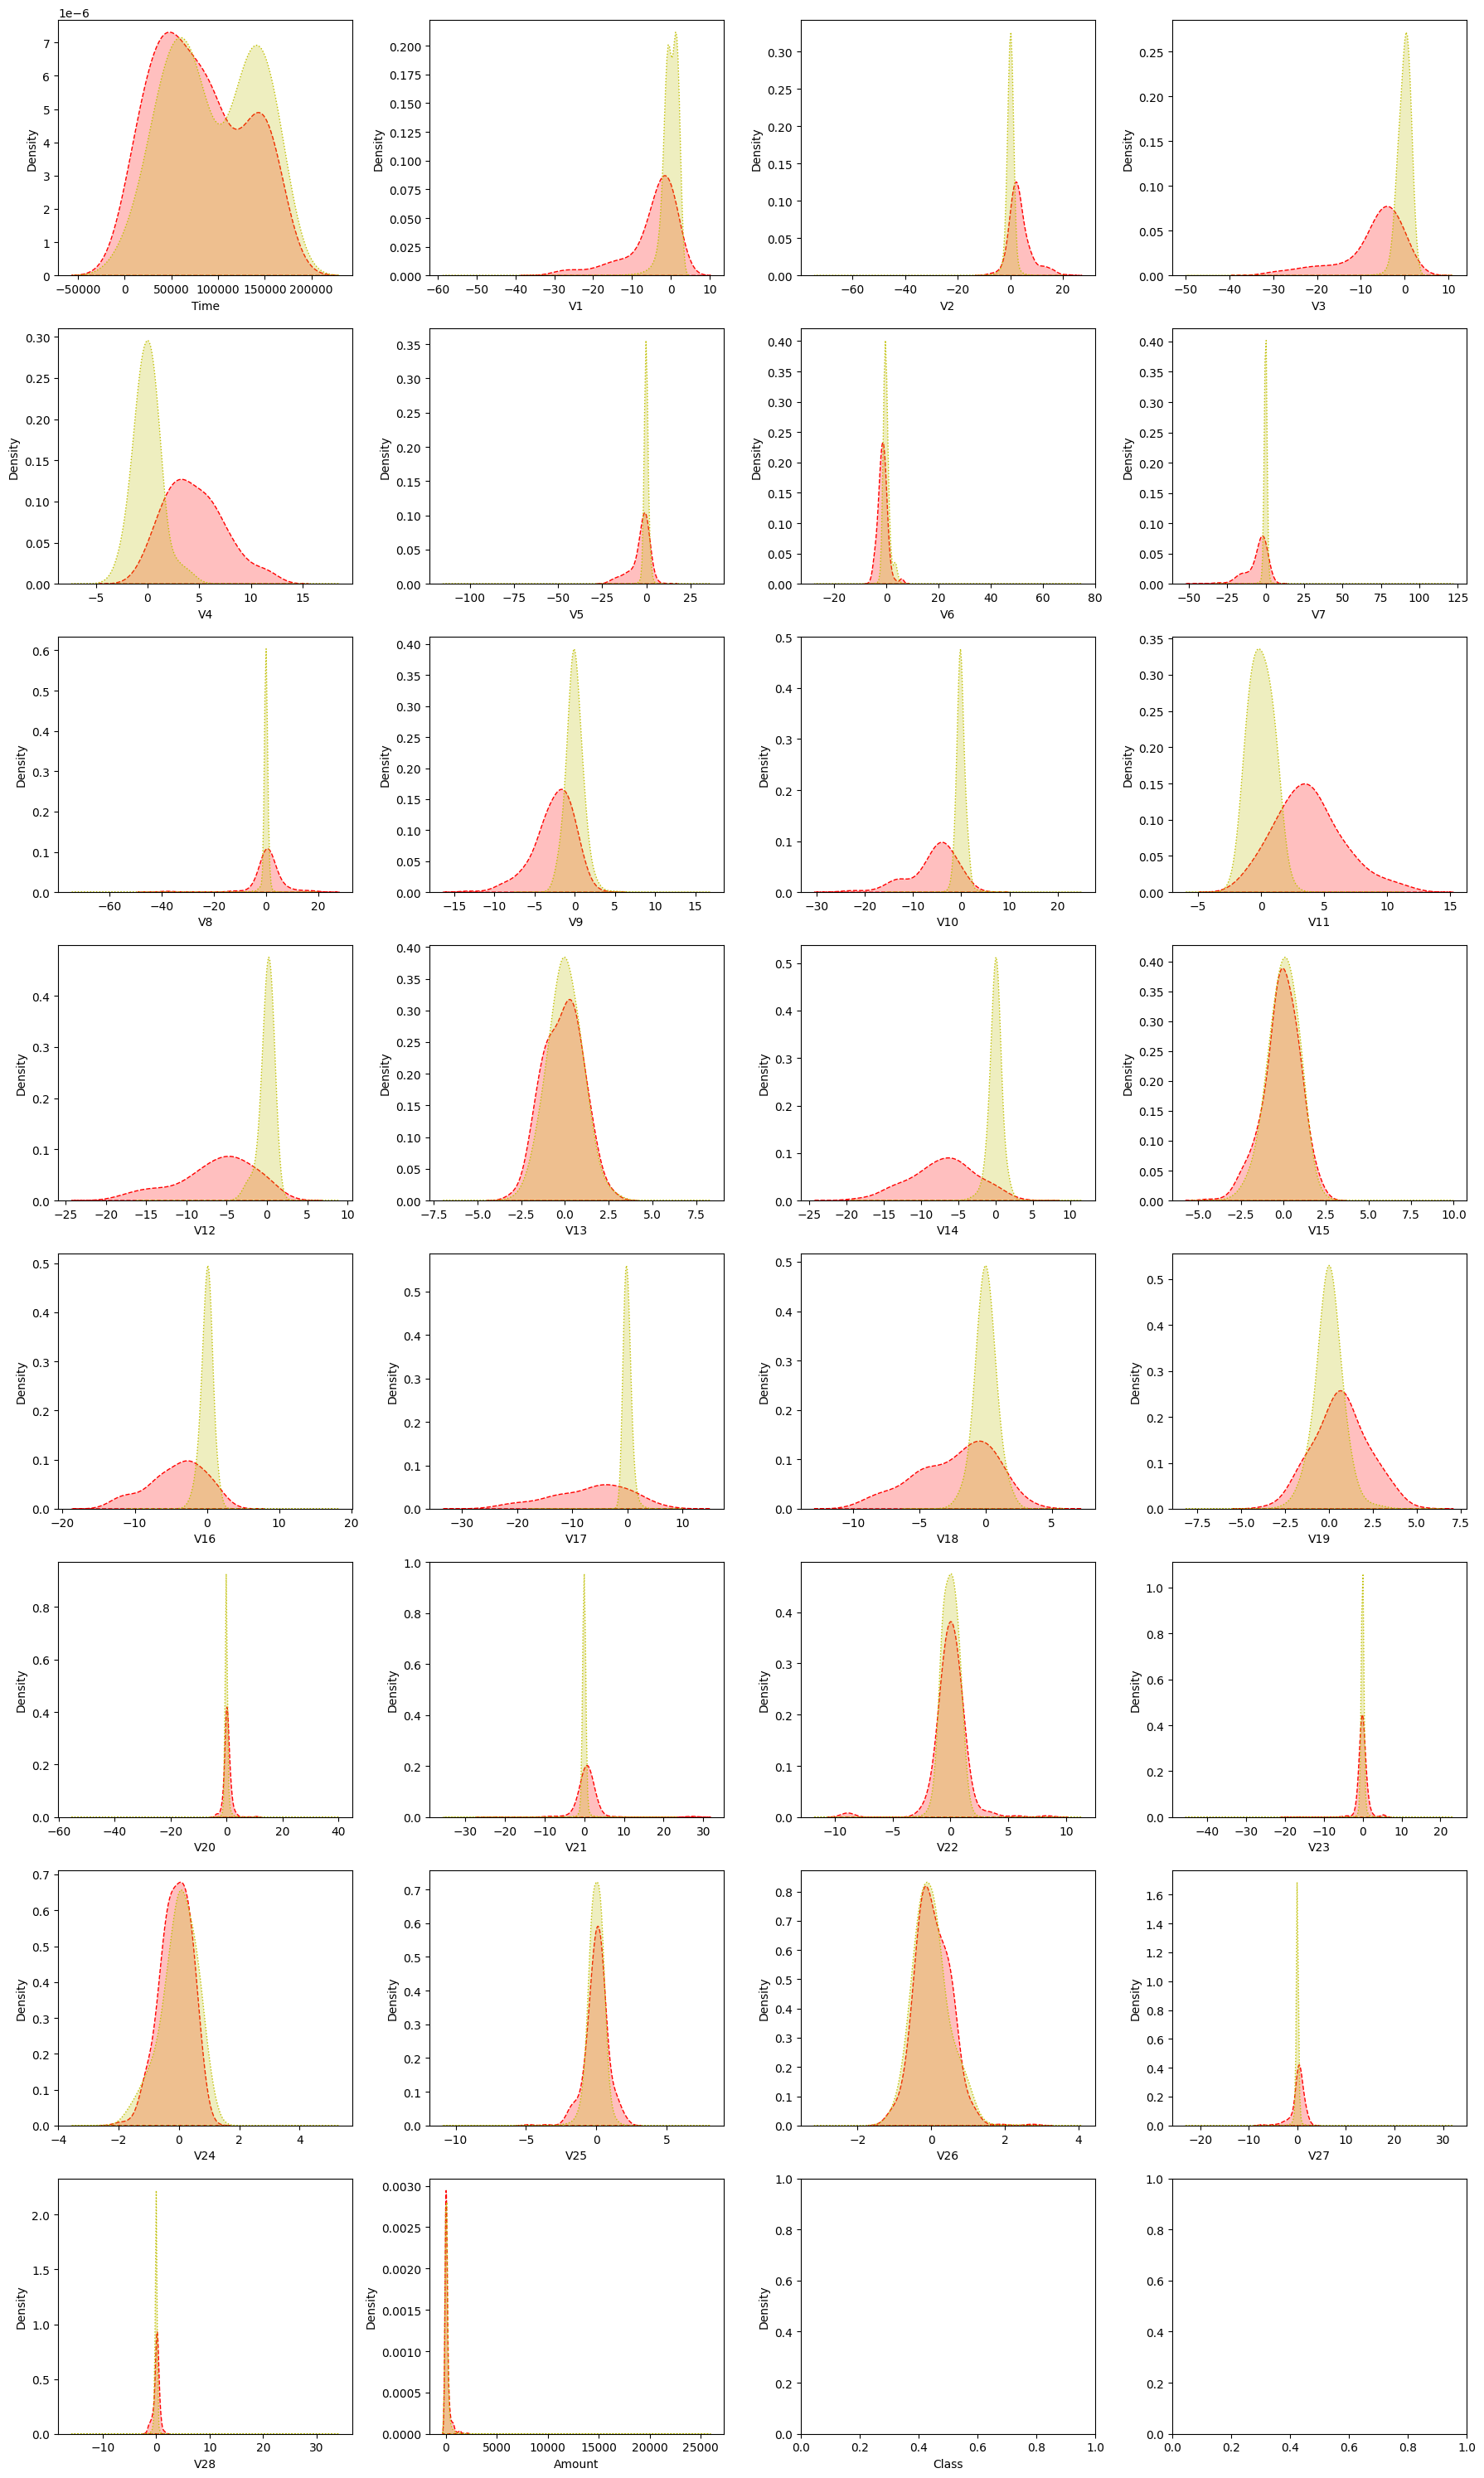

In [ ]:
# Performsing Kernel Density Estimation (KDE) visualization to compare the distribution of features between fraudulent and non-fraudulent transactions
fig, axes = plt.subplots(8, 4, figsize=(18, 30)) # Create figure and axes grid
for i, ax in enumerate(axes.flatten()):
    if i < len(column_headers):
        column_header = column_headers[i]
        # For fraud data
        sns.kdeplot(fraud[column_header], bw_method=0.4, label="Fraud", fill=True, color="r", linestyle="--", ax=ax, warn_singular=False)
        # For non_fraud data
        sns.kdeplot(non_fraud[column_header], bw_method=0.4, label="Non Fraud", fill=True, color="y", linestyle=":", ax=ax, warn_singular=False)


plt.tight_layout() # Adjust Layout to prevent overlap
plt.show()

## 4: Data Cleaning

In [ ]:
# Creating a standard scaler object and Normalizing the Amount column
sc_df = StandardScaler()
balanced_df["nomarlized_amount"] = sc_df.fit_transform(balanced_df["Amount"].values.reshape(-1, 1))

In [ ]:
# Dropping features that are useless for the task and creating the feature matrix input
X = balanced_df.drop(["Time", "Amount", "V8", "V13", "V15", "V20", "V22" ,"V23", "V24", "V25","V26", "V27", "V28", "Class"], axis=1)

In [ ]:
X

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,nomarlized_amount
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,-2.770089,-2.772272,3.202033,-2.899907,-4.289254,-1.140747,-2.830056,-0.016822,0.416956,0.517232,-0.446865
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.270953,-0.838587,-0.414575,-0.503141,-1.692029,0.666780,0.599717,1.725321,0.283345,0.661696,1.979013
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.238253,-1.525412,2.032912,-6.560124,-1.470102,-2.282194,-4.781831,-2.615665,-1.334441,-0.294166,0.653401
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.247768,-4.801637,4.895844,-10.912819,-6.771097,-7.358083,-12.598419,-5.131549,0.308334,0.573574,-0.176304
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-1.282858,-2.447469,2.101344,-4.609628,-6.079337,2.581851,6.739384,3.042493,-2.721853,-0.379068,-0.442280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.986128,-0.243271,1.343364,1.218795,-1.135148,-0.265079,-0.557187,0.569375,-0.128072,-0.337551,0.633883,-0.310353,0.735505,-0.811870,0.517452,-0.824494,0.318064,0.011896
980,-1.234839,0.886007,1.878960,-0.572376,0.738216,-0.651306,0.993559,0.200025,-0.082661,-0.060277,-0.866406,-0.707223,0.192313,-0.097916,-0.590864,-1.041755,-0.348047,-0.430402
981,-5.167269,-6.657790,-2.947100,0.863368,6.943564,-5.024683,-2.098135,-0.032190,-0.632528,-1.982637,0.901151,1.404580,-0.618679,-0.550942,0.105776,-0.534150,1.216726,-0.442280
982,1.212817,0.309481,0.278839,0.643197,-0.180087,-0.601571,0.013002,0.020312,-0.328519,0.164530,0.349802,-0.270238,0.183519,0.269872,-0.754883,-0.557177,-0.259229,-0.437785


In [ ]:
# Creating the target variable
y = balanced_df["Class"]

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
979    0
980    0
981    0
982    0
983    0
Name: Class, Length: 984, dtype: int64

In [ ]:
# Checking the shapes of both X and y variables
X.shape, y.shape

((984, 18), (984,))

In [ ]:
# Splitting the dataset into train, validation and test sets using scikit-learn train_test_split function
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=27)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=27)

In [ ]:
# Checking the shape of the different sets
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((787, 18), (787,), (98, 18), (98,), (99, 18), (99,))

In [ ]:
def create_dataset(features, label):
    # Converting features and labels into tensors
    features = tf.cast(features, tf.float32)
    label = tf.cast(label, tf.int32)
    dataset = tf.data.Dataset.from_tensor_slices((features, label))
    return dataset

train_data = create_dataset(X_train, y_train)
val_data = create_dataset(X_val, y_val)
test_data = create_dataset(X_test, y_test)

In [ ]:
# Building the pipeline for training data
train_data = train_data.shuffle(buffer_size=300).cache().batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
# Doing the same thing for validation and test data. They don't require shuffling or caching
val_data = val_data.batch(batch_size=32)
test_data = test_data.batch(batch_size=32)

In [ ]:
# Inspecting tensors
train_data, val_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 18), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 18), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 18), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [ ]:
# feature scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

## Step 5: Building the model

We designed a CNN model with multiple convolutional and fully connected layers and we used activation functions like (ReLU) to enable the network to learn non-linear relationships, build complex representations of data, and create decision boundaries for accurate predictions. We included dropout layers to prevent overfitting.

Model Architecture (CNN):

Convolutional layers:
* The CNN employs convolutional layers to extract spatial features from the transaction data, which can be crucial for identifying patterns indicative of fraud.

Pooling layers:
* Pooling layers downsample the data, reducing its dimensionality while preserving important features.

Flatten layer:
* The flattened output from the convolutional layers is fed into a fully connected layer for classification

* Activation functions:
ReLU (Rectified Linear Unit) activation functions are commonly used in CNNs to introduce non-linearity and improve model capacity


In [ ]:
# Creating a sequential model for building layers
model = Sequential()
# Building a convolutional layer with Relu activation function
model.add(Conv1D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=(18, 1)))
# Building a batch normalization layer
model.add(BatchNormalization())
# Building a maxpooling layer
model.add(MaxPooling1D(pool_size=2))
# Building a dropout layer
model.add(Dropout(0.2))
# Building a secong convolutional layer
model.add(Conv1D(filters=64, kernel_size=2, padding="same", activation="relu"))
# Batch normalization
model.add(BatchNormalization())
# Maxpooling layer
model.add(MaxPooling1D(pool_size=2))
# Dropout layer
model.add(Dropout(0.3))
# Building a flatten layer
model.add(Flatten())
# Building a dense layer
model.add(Dense(units=64, activation="relu"))
# Dropout layer
model.add(Dropout(0.3))
# Bulding the output layer
model.add(Dense(units=1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 18, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 9, 32)             0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 9, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 64)             4160      
                                                                 
 batch_normalization_1 (Bat  (None, 9, 64)             2

## Step 6: Training the model

We trained the model using the training set and evaluated its performance on the validation set. Used metrics such as accuracy, ROC AUC score, confusion matrix, and classification report to evaluate the model.

Training Process:

Loss function:
* The binary cross-entropy loss function is typically used for credit card fraud detection, measuring the difference between predicted and actual fraud labels (0 for legitimate, 1 for fraudulent).

Optimizer:
* An optimizer like Adam is employed to adjust model weights during training, minimizing the loss function.

Training epochs:
* The model is trained for a specific number of epochs (iterations) over the training data.

Validation set:
* A separate validation set is used to monitor model performance during training and prevent overfitting.


In [ ]:
# Compiling the model
optima = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optima, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Training the model
history = model.fit(train_data, epochs=25, validation_data=val_data)

Epoch 1/25
25/25 [==============================] - 8s 25ms/step - loss: 0.5599 - accuracy: 0.7230 - val_loss: 0.4437 - val_accuracy: 0.7959
Epoch 2/25
25/25 [==============================] - 0s 7ms/step - loss: 0.4088 - accuracy: 0.8412 - val_loss: 0.3587 - val_accuracy: 0.8980
Epoch 3/25
25/25 [==============================] - 0s 7ms/step - loss: 0.3238 - accuracy: 0.8767 - val_loss: 0.3007 - val_accuracy: 0.9082
Epoch 4/25
25/25 [==============================] - 0s 7ms/step - loss: 0.3207 - accuracy: 0.8767 - val_loss: 0.2637 - val_accuracy: 0.9184
Epoch 5/25
25/25 [==============================] - 0s 6ms/step - loss: 0.3190 - accuracy: 0.8958 - val_loss: 0.2413 - val_accuracy: 0.9184
Epoch 6/25
25/25 [==============================] - 0s 7ms/step - loss: 0.2718 - accuracy: 0.9060 - val_loss: 0.2274 - val_accuracy: 0.9184
Epoch 7/25
25/25 [==============================] - 0s 7ms/step - loss: 0.2753 - accuracy: 0.9034 - val_loss: 0.2173 - val_accuracy: 0.9184
Epoch 8/25
25/25 [=

## 7: Model Evaluation

Assessed the model's performance on the test set using accuracy and ROC AUC score. Visualized the results using confusion matrix and classification report.

Performance Metrics:

Validation Accuracy:
* Measures the percentage of correctly classified transactions on the validation set (0.9286 in this example).

Test Accuracy:
* Evaluates the model's generalization ability on unseen data from the test set (0.9192 in this example).

ROC AUC Score (Area Under the ROC Curve):
* A metric independent of class imbalance, indicating the model's ability to discriminate between fraudulent and legitimate transactions (0.9624 in this example).

Confusion Matrix:
* Visualizes the number of true positives, true negatives, false positives, and false negatives for fraud detection.

Classification Report:
* Provides detailed precision, recall, and F1-score for each class (legitimate and fraudulent transactions).

Results and Discussion:

The model achieved promising results:
* Validation Accuracy: 0.9286 indicates good performance on the validation set.

* Test Accuracy: 0.9192 suggests the model generalizes well to unseen data.

* ROC AUC Score: 0.9624 demonstrates a strong ability to distinguish between fraudulent and legitimate transactions.

* Confusion Matrix and Classification Report: Help analyze the outputs to understand how well the model performs on each class and identify potential areas for improvement.

In [ ]:
# Evaluating the model on validation data
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

4/4 [==============================] - 0s 5ms/step - loss: 0.2028 - accuracy: 0.9286
Validation Loss: 0.2028212994337082
Validation Accuracy: 0.9285714030265808


In [ ]:
# Predicting on the test set
predictions = model.predict(test_data)
#predictions

4/4 [==============================] - 0s 5ms/step


In [ ]:
# Calculating the accuracy and rounding predictions for binary classification
accuracy = accuracy_score(y_test, predictions.round())
print(f"The Accuracy is: {accuracy:.4f}")

The Accuracy is: 0.9192


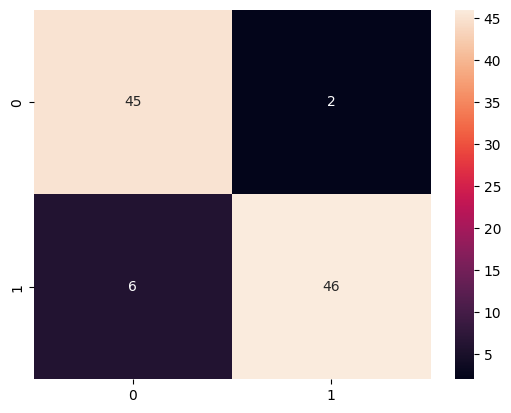

In [ ]:
# Calculating confusion matrix
cm = confusion_matrix(y_test, predictions.round())
sns.heatmap(cm, annot=True);

In [ ]:
# Generating classification report
report = classification_report(y_test, predictions.round())
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        47
           1       0.96      0.88      0.92        52

    accuracy                           0.92        99
   macro avg       0.92      0.92      0.92        99
weighted avg       0.92      0.92      0.92        99



In [ ]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

In [ ]:
# Calculating ROC, AUC, Score
auc = roc_auc_score(y_test, predictions)
print(f"Roc AUC Score: {auc:.4f}")

Roc AUC Score: 0.9624


In [ ]:
def learning_curve(history, epoch):
    # Training vs Validation accuracy
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history["accuracy"])
    plt.plot(epoch_range, history.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "val"], loc="upper left")
    plt.show()

    # Training vs validation loss
    plt.plot(epoch_range, history.history["loss"])
    plt.plot(epoch_range, history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "val"], loc="upper left")
    plt.show()

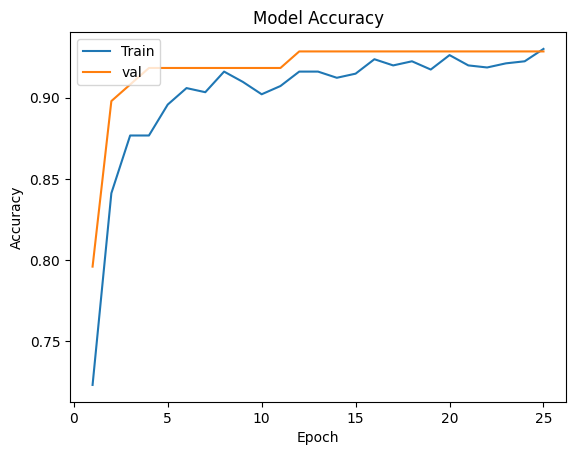

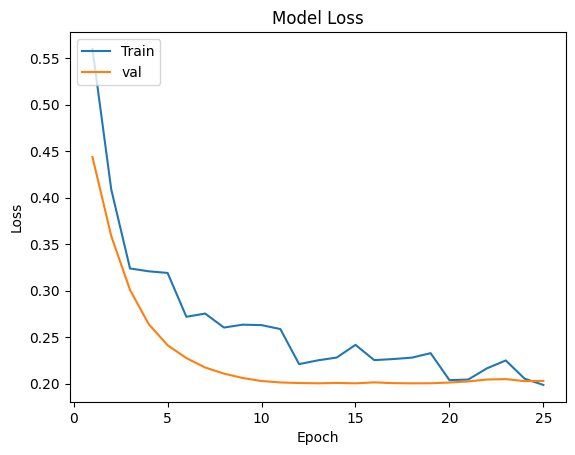

In [ ]:
learning_curve(history, 25)

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_data)
print("Test Accuracy:", accuracy)

# Evaluation on validation data (assuming you have a validation set)
X_val = ...  # Validation data features
y_val = ...  # Validation data labels (spam/not spam)
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Accuracy:", accuracy)

# Prediction on new email
new_email_data = ...  # Features of a new email
prediction = model.predict(np.array([new_email_data]))[0][0]
if prediction > 0.5:  # Adjust threshold based on your model
  print("Predicted Spam!")
else:
  print("Predicted Not Spam!")

In [ ]:
# Test_data is a batched dataset containing both features and labels
predictions = model.predict(test_data)  # Get model predictions on the test data

# No need for one-hot encoding since labels are integers

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions.round())  # Round predictions for binary classification

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions.round())
print("Confusion Matrix:\n", cm)

# Generate classification report
report = classification_report(y_test, predictions.round())
print("Classification Report:\n", report)

print("Accuracy:", accuracy)

# Precision-Recall Curve (optional)
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
# You can plot the curve or use precision and recall at specific thresholds

# ROC AUC score
auc = roc_auc_score(y_test, predictions)
print("ROC AUC Score:", auc)


## Future Work
Here are some future directions:

* Hyperparameter Tuning:
 * Exploring different hyperparameters (e.g., number of convolutional layers, filter sizes) could further optimize performance.

* Class Imbalance Handling:
 * It is when we have more legitimate transactions than fraudulent ones. exploring techniques like SMOTE (Synthetic Minority Oversampling Technique) to address the imbalanced dataset.

* Real-Time Fraud Detection:
 * Integrate the model into a real-time system to identify fraudulent transactions as they occur.

## Conclusion

This project demonstrates the effectiveness of CNNs in credit card fraud detection using transaction data. By following a structured approach to data preprocessing, model design, training, and evaluation, we achieved a robust model with high performance metrics. This project can serve as a template for similar tasks in fraud detection and showcases the powerful capabilities of deep learning models in real-world applications.
